# The Classical Perceptron Learning Model 
### Using the Iris Dataset, which is primarily linearly separable. We should get fairly high prediction power on this dataset.



![title](perceptron.png)

                                  Network view of the classical perceptron

![title](iris.jpeg)

#### Our model is trying to tell the difference between these three flowers.




In [13]:
using CSV
iris = CSV.read("iris.csv")
iris = iris[1:100, :]

for i = 1 : 100
    if iris[i, 5] == "setosa"
        iris[i,5] = "1"
    else
        iris[i,5] = "0"
    end
end

*** We will use the petal length and petal width for our analysis. Hopefully this data will be linearly separable. ***

In [15]:
data = [x for x in zip(iris[3], iris[4], iris[5])]
data

100-element Array{Tuple{Float64,Float64,String},1}:
 (1.4, 0.2, "1")
 (1.4, 0.2, "1")
 (1.3, 0.2, "1")
 (1.5, 0.2, "1")
 (1.4, 0.2, "1")
 (1.7, 0.4, "1")
 (1.4, 0.3, "1")
 (1.5, 0.2, "1")
 (1.4, 0.2, "1")
 (1.5, 0.1, "1")
 (1.5, 0.2, "1")
 (1.6, 0.2, "1")
 (1.4, 0.1, "1")
 ⋮              
 (4.1, 1.3, "0")
 (4.0, 1.3, "0")
 (4.4, 1.2, "0")
 (4.6, 1.4, "0")
 (4.0, 1.2, "0")
 (3.3, 1.0, "0")
 (4.2, 1.3, "0")
 (4.2, 1.2, "0")
 (4.2, 1.3, "0")
 (4.3, 1.3, "0")
 (3.0, 1.1, "0")
 (4.1, 1.3, "0")

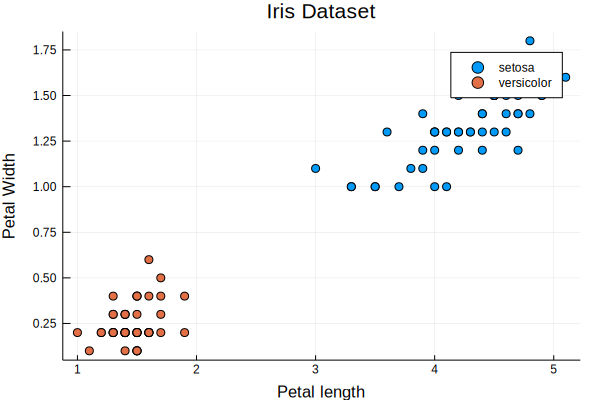

In [16]:
using Plots
scatter([x[1:2] for x in data if x[3] == "0"], label = "setosa")
scatter!([x[1:2] for x in data if x[3] != "0"], label = "versicolor")
plot!(title = "Iris Dataset", xlabel = "Petal length", ylabel = "Petal Width")

## This looks great for our perceptron model. VERY separate data. It should be a piece of cake to differentiate between classes.

In [17]:
# This code assigns x1 and x2 to tuples of their values, and assigns the x3 value to a vector of the outcomes (1 or -1).
X, Y = [[x[1], x[2]] for x in data], [x[3] == 1 ? 1 : -1 for x in data];

In [18]:
# Assign random weights
w = rand(3)

# Perceptron Hypothesis Function definition
function h(w, x)
    x_new = [1.0, x[1], x[2]]
    return w'x_new > 0 ? 1 : -1
end

h (generic function with 1 method)

In [19]:
# Perceptron Learning Algorithm definition
function PLA(w, x, y)
    if h(w, x) != y
        w += y*[1.0, x[1], x[2]]
    end
    return w
end

PLA (generic function with 1 method)

In [20]:
# Iterate the PLA 
for i = 1:3000
    # Choose random entries to update (if possible )
    j = rand(1:100)
    w = PLA(w, X[j], Y[j])
end

In [34]:
# Create a user friendly function that predicts the species of a given flower
function predictor(n)
    return h(w, X[n]) == 0 ? "Versicolor" : "Setosa"
end

predictor (generic function with 1 method)

## Time to test our model! (1 = Setosa, 0 = Versicolor)

In [35]:
# Test your predictions!
predictor(50)

"Setosa"

In [36]:
iris[50,5] 

"1"

In [37]:
predictor(100)

"Setosa"

In [38]:
iris[100,5]

"0"

In [39]:
predictor(1)

"Setosa"

In [40]:
iris[1,5]

"1"